<h1>Multi class classsification using MNIST Dataset</h1>


In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD, RMSprop
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [2]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [4]:
def plot_loss_acc(history):

    fig = plt.figure(figsize = (14, 4))
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')

    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')

    plt.tight_layout()

### SGD

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [8]:
# Complete the following function with cross entropy  loss
#  sgd optimizer and also tell the model to evaluate the 
# accuracy
#model.compile( ... )

model.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer= SGD(),
              metrics=['accuracy'])

In [9]:
# Complete the code .
#  Give the following inputs training and validation data, 
# number of epochs, batch size etc.
# model.fit( ... )

history = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs*3,
            verbose=1,
            validation_data=(x_test, y_test))

Epoch 1/36
469/469 [==============================] - 14s 31ms/step - loss: 0.9966 - accuracy: 0.6816 - val_loss: 0.3090 - val_accuracy: 0.9091
Epoch 2/36
469/469 [==============================] - 14s 30ms/step - loss: 0.4284 - accuracy: 0.8682 - val_loss: 0.2230 - val_accuracy: 0.9334
Epoch 3/36
469/469 [==============================] - 13s 29ms/step - loss: 0.3554 - accuracy: 0.8913 - val_loss: 0.1984 - val_accuracy: 0.9402
Epoch 4/36
469/469 [==============================] - 14s 29ms/step - loss: 0.3156 - accuracy: 0.9051 - val_loss: 0.1739 - val_accuracy: 0.9482
Epoch 5/36
469/469 [==============================] - 14s 29ms/step - loss: 0.2903 - accuracy: 0.9126 - val_loss: 0.1583 - val_accuracy: 0.9543
Epoch 6/36
469/469 [==============================] - 14s 29ms/step - loss: 0.2695 - accuracy: 0.9203 - val_loss: 0.1454 - val_accuracy: 0.9540
Epoch 7/36
469/469 [==============================] - 14s 29ms/step - loss: 0.2531 - accuracy: 0.9244 - val_loss: 0.1354 - val_accuracy:

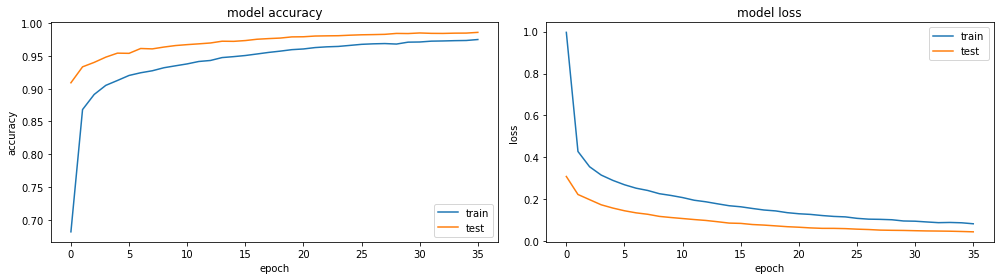

In [10]:
plot_loss_acc(history)

In [11]:
# Give the test data and find the results. 
score = model.evaluate(x_test, y_test, batch_size = batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

79/79 [==============================] - 1s 8ms/step - loss: 0.0449 - accuracy: 0.9860
Test loss: 0.04486367478966713
Test accuracy: 0.9860000014305115


## RMSprop

In [12]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

model2.summary()


model2.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer= RMSprop(),
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [13]:
history2 = model2.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 17s 37ms/step - loss: 0.2270 - accuracy: 0.9323 - val_loss: 0.0636 - val_accuracy: 0.9799
Epoch 2/12
469/469 [==============================] - 17s 36ms/step - loss: 0.0838 - accuracy: 0.9757 - val_loss: 0.0421 - val_accuracy: 0.9873
Epoch 3/12
469/469 [==============================] - 17s 36ms/step - loss: 0.0650 - accuracy: 0.9815 - val_loss: 0.0366 - val_accuracy: 0.9883
Epoch 4/12
469/469 [==============================] - 17s 36ms/step - loss: 0.0543 - accuracy: 0.9842 - val_loss: 0.0409 - val_accuracy: 0.9864
Epoch 5/12
469/469 [==============================] - 17s 36ms/step - loss: 0.0493 - accuracy: 0.9854 - val_loss: 0.0354 - val_accuracy: 0.9895
Epoch 6/12
469/469 [==============================] - 17s 36ms/step - loss: 0.0460 - accuracy: 0.9870 - val_loss: 0.0344 - val_accuracy: 0.9889
Epoch 7/12
469/469 [==============================] - 17s 36ms/step - loss: 0.0450 - accuracy: 0.9866 - val_loss: 0.0302 - val_accuracy:

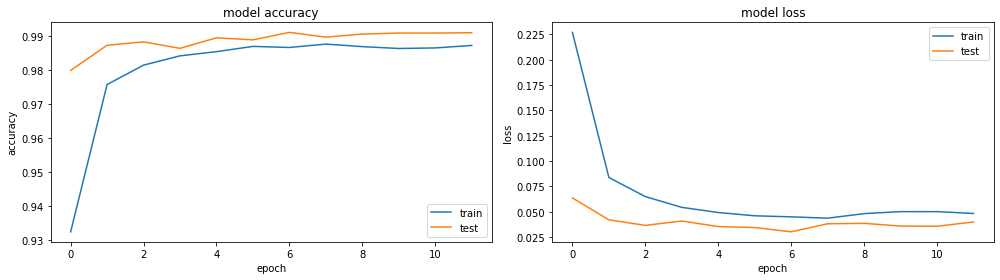

In [14]:
plot_loss_acc(history2)

In [29]:
# Give the test data and find the results. 
score = model2.evaluate(x_test, y_test, batch_size = batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

79/79 [==============================] - 1s 7ms/step - loss: 0.0400 - accuracy: 0.9910
Test loss: 0.03996631130576134
Test accuracy: 0.9909999966621399


## New architecture

In [20]:
model3 = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=input_shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_10 (Dense)             (None, 84)               

In [21]:
model3.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer= RMSprop(),
              metrics=['accuracy'])

In [22]:
history3 = model3.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs*2,
            verbose=1,
            validation_data=(x_test, y_test))

Epoch 1/24
469/469 [==============================] - 5s 10ms/step - loss: 0.2884 - accuracy: 0.9165 - val_loss: 0.1465 - val_accuracy: 0.9543
Epoch 2/24
469/469 [==============================] - 4s 9ms/step - loss: 0.1103 - accuracy: 0.9661 - val_loss: 0.0870 - val_accuracy: 0.9731
Epoch 3/24
469/469 [==============================] - 4s 9ms/step - loss: 0.0732 - accuracy: 0.9768 - val_loss: 0.0612 - val_accuracy: 0.9809
Epoch 4/24
469/469 [==============================] - 4s 9ms/step - loss: 0.0542 - accuracy: 0.9829 - val_loss: 0.0601 - val_accuracy: 0.9799
Epoch 5/24
469/469 [==============================] - 4s 9ms/step - loss: 0.0421 - accuracy: 0.9867 - val_loss: 0.0467 - val_accuracy: 0.9858
Epoch 6/24
469/469 [==============================] - 4s 9ms/step - loss: 0.0341 - accuracy: 0.9892 - val_loss: 0.0442 - val_accuracy: 0.9852
Epoch 7/24
469/469 [==============================] - 4s 9ms/step - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.0512 - val_accuracy: 0.9834
Epoch

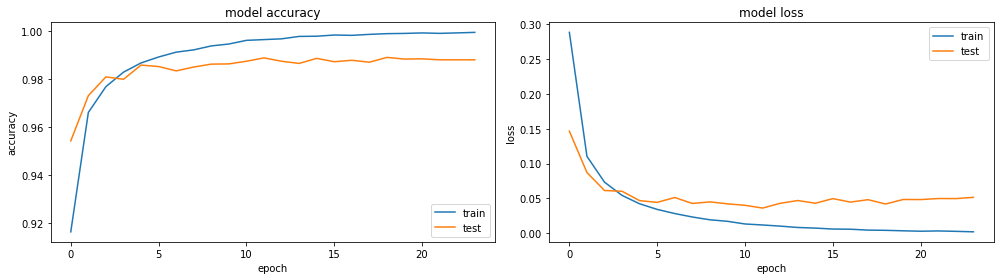

In [23]:
plot_loss_acc(history3)

In [30]:
# Give the test data and find the results. 
score = model3.evaluate(x_test, y_test, batch_size = batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

79/79 [==============================] - 0s 4ms/step - loss: 0.0514 - accuracy: 0.9880
Test loss: 0.05140097066760063
Test accuracy: 0.9879999756813049


### with dropouts

In [25]:
model4 = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=input_shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 400)              

In [26]:
model4.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer= RMSprop(),
              metrics=['accuracy'])

In [27]:
history4 = model4.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=18,
            verbose=1,
            validation_data=(x_test, y_test))

Epoch 1/18
469/469 [==============================] - 6s 12ms/step - loss: 0.3680 - accuracy: 0.8902 - val_loss: 0.1663 - val_accuracy: 0.9485
Epoch 2/18
469/469 [==============================] - 6s 12ms/step - loss: 0.1604 - accuracy: 0.9507 - val_loss: 0.1025 - val_accuracy: 0.9668
Epoch 3/18
469/469 [==============================] - 6s 12ms/step - loss: 0.1157 - accuracy: 0.9632 - val_loss: 0.0779 - val_accuracy: 0.9747
Epoch 4/18
469/469 [==============================] - 6s 12ms/step - loss: 0.0916 - accuracy: 0.9713 - val_loss: 0.0705 - val_accuracy: 0.9781
Epoch 5/18
469/469 [==============================] - 6s 12ms/step - loss: 0.0799 - accuracy: 0.9750 - val_loss: 0.0577 - val_accuracy: 0.9824
Epoch 6/18
469/469 [==============================] - 6s 12ms/step - loss: 0.0692 - accuracy: 0.9780 - val_loss: 0.0548 - val_accuracy: 0.9821
Epoch 7/18
469/469 [==============================] - 6s 12ms/step - loss: 0.0634 - accuracy: 0.9800 - val_loss: 0.0509 - val_accuracy: 0.9846

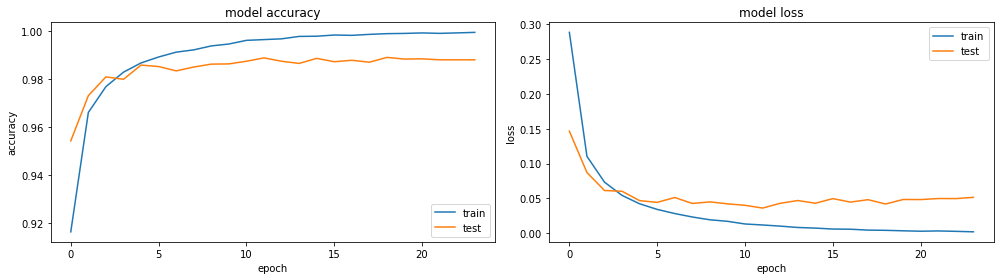

In [28]:
plot_loss_acc(history3)

In [31]:
# Give the test data and find the results. 
score = model4.evaluate(x_test, y_test, batch_size = batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

79/79 [==============================] - 0s 4ms/step - loss: 0.0480 - accuracy: 0.9852
Test loss: 0.04799205809831619
Test accuracy: 0.9851999878883362
